In [1]:
import numpy as np
import matplotlib.pyplot as plt #소리 데이터의 그래프 표현을 위한 모듈
import scipy.io.wavfile #소리를 파일로 읽어서 1초당 샘플링한 횟수인 샘플링 주파수(sampling rate)와 샘플링 시점의 진폭 데이터를 1차원 행렬로 반환
import sounddevice as sd #소리데이터를 실제 스피커로 출력하기 위한 사운드 장치

In [2]:
v_samplerate, v_data = scipy.io.wavfile.read('thank_you.wav')
times = np.arange(len(v_data)) / float(v_samplerate) #x축 시간 정보 구하기

sampling rate : 22050
time : 0.7813605442176871
vData : [  2899   3912   4583   4520   3852   2744   1496    725    890   1968
   3470   4616   4867   4266   3267   2566   2671   3451   4471   5311
   5480   4789   3642   2628   2172   2296   2552   2587   2365   1788
    812   -417  -1848  -3250  -4074  -4209  -4236  -4794  -6158  -8135
 -10150 -11595 -12089 -11715 -11148 -11117 -11836 -13066 -14205 -14524
 -13937 -13173 -12830 -12816 -12661 -11620  -8703  -3632   2073   5600
   5077   1793   -231   2004   7297  11561  11937   9086   5769   3724
   2460   1004   -461  -1253  -1480  -2055  -3581  -5579  -7018  -7343
  -6614  -4950  -2371    628   2774   2899   1316     -9    945   4290
   8101  10304  10278   8894   7496   6716   6502   6936   7903   8664]


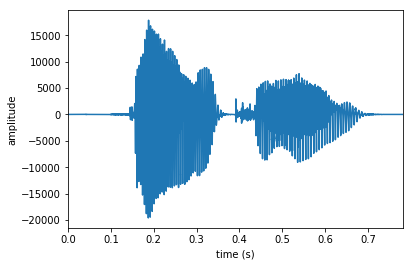

In [3]:
print('sampling rate :', v_samplerate)
print('time :', times[-1])    #time의 마지막 값 출력
print('vData :',v_data[5000:5100])
sd.play(v_data, v_samplerate)

#wav 형식의 소리 데이터를 그래프로 출력
plt.plot(times, v_data)
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

## Handling Sound data

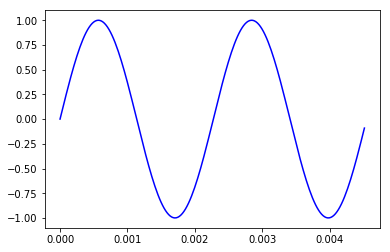

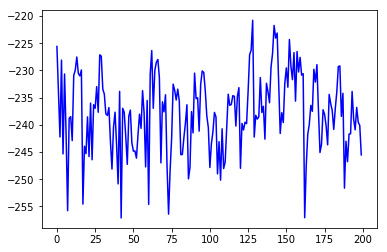

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import os



""" 생성할 소리 데이터의 속성과 사인함수로 생성할 데이터를 저장하기 위한 환경 변수 설정"""
Fs = 44100.0                 #정보 샘플링 주파수 , 1초에 44100개의 샘플링, 단위는 Hz
t_len = 1                    #1초로 초기화
Ts = 1 / Fs                 #샘플링 사이의 간격 계산
t = np.arange(0, t_len, Ts) #소리 데이터를 생성할 시간 성분으로 구성된 배열로, 0과 1 사이를 Time stamp(Ts) 간격으로 분할하여
                            #Fs개의 데이터를 담는 배열 t 생성
    
""" 사인함수를 이용해 임의의 소리 데이터 만들기"""
sin_freq = 440                  #사인 곡선의 주파수
src = 2 * np.pi * sin_freq * t #t배열의 각 성분값에 사인함수의 주기를 라디안 단위로 변환한 src 배열 준비
signal = np.sin(src)           #timestamp를 각으로 변환한 src 배열에 맞게 사인함수 데이터를 변환한다.

x_range = 200                                          #시작부터 200개의 데이터만 보여 주기 위한 범위값 지정
plt.plot(t[0:x_range], signal[0:x_range], color='blue')#x축의 timestamp에 사인함수로 생성한 데이터를 y축에 좌표로 그래프 그린다
plt.show()

freq = np.fft.fftfreq(len(t), Ts) #주파수 영역에서의 샘플링 구간값의 배열
signal_f = np.fft.fft(signal)     #사인함수 값으로부터 주파수 영역에서의 정보를 나타내기 위한 퓨리에 변환값을 signal_f 배열로 저장
plt.plot(freq[0:x_range], 20 * np.log10(np.abs(signal_f[0:x_range])), color = 'blue') #x축 주파수 성분에 맞게 그래프 그리기
plt.show()

In [7]:
"""생성한 소리데이터 wav로 저장하기 """
scaled = np.int16(signal / np.max(np.abs(signal)) * 32767) #사인함수로 생성한 데이터는 np.abs로 구한 소리 데이터의 
write('soundfiles/snd_signal.wav', 44100, scaled)

noise[0:20]= [ 0.38414767  0.40304155 -0.53421333  0.01647767 -0.56063322 -0.6258827
 -0.46923167 -0.52874286 -0.73338801  0.07324244 -0.98736347  0.31527545
 -0.45989573  0.81589861  0.784644   -0.15630424 -0.47473111 -0.24588849
  0.01936468 -0.77807769]
scaled_noise[0:20]= [ 0.1152443   0.12091247 -0.160264    0.0049433  -0.16818996 -0.18776481
 -0.1407695  -0.15862286 -0.2200164   0.02197273 -0.29620904  0.09458264
 -0.13796872  0.24476958  0.2353932  -0.04689127 -0.14241933 -0.07376655
  0.0058094  -0.23342331]


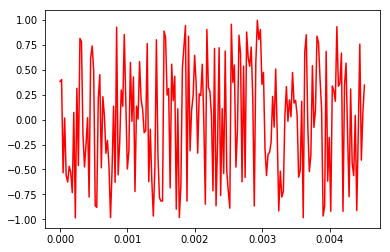

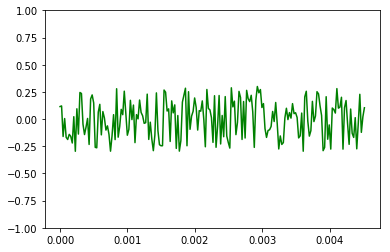

In [9]:
"""잡음 데이터 만들기"""
noise = np.random.uniform(-1, 1, len(t))    #균등 분포의 난수로 구성된 잡음 데이터
scaled_noise = noise * 0.3                  # noise 데이터의 볼륨을 30% 수준으로 낮춘다.

print('noise[0:20]=', noise[0:20])
print('scaled_noise[0:20]=', scaled_noise[0:20])

#시각화 : -1과 1 사이의 값으로 구간에서 생성한 잡음 데이터를 그랲 표현한다.
plt.plot(t[0:x_range], noise[0:x_range], color='red')
plt.show()

#데이터 시각화 : 원 데이터의 볼륨을 낮춘 scaled_noise 데이터를 그래프로 표현한다.
plt.plot(t[0:x_range], scaled_noise[0:x_range], color='green')
plt.ylim(-1,1)
plt.show()

scaled = np.int16(noise/np.max(np.abs(noise)) * 32767)
write('noise_signal.wav',44100,scaled)

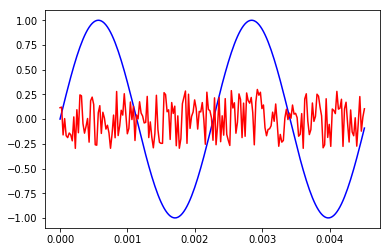

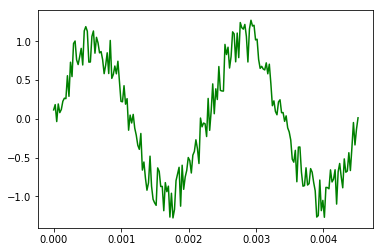

In [11]:
""" 소리 합성 """
signal_n = signal + noise
scaled_noise = noise * 0.3
signal_n = signal + scaled_noise

scaled = np.int16(signal_n / np.max(np.abs(signal_n)) * 32767)
write('snd_noise.wav', 44100, scaled)

plt.plot(t[0:x_range], signal[0:x_range], color='blue')
plt.plot(t[0:x_range], scaled_noise[0:x_range], color='red')

plt.show()

plt.plot(t[0:x_range], signal_n[0:x_range], color='green')
plt.show()

In [13]:
import numpy as np
import scipy.io as sio
from scipy.io.wavfile import write
import os

v_samplerate, v_data = sio.wavfile.read('soundfiles/thank_you.wav')
b_samplerate, b_data = sio.wavfile.read('soundfiles/Invisible_Beauty.wav')

v_times = np.arange(len(v_data)) / float(v_samplerate)
b_times = np.arange(len(b_data)) / float(b_samplerate)

print('sampling rate:', v_samplerate, b_samplerate)
print('time:', v_times[-1], b_times[-1])
print('len :', len(v_data), len(b_data))

print(v_data.shape)
print(b_data.shape)
""" 소리 데이터와 샘플링 주파수 확인 """

sampling rate: 22050 44100
time: 0.7813605442176871 187.1887074829932
len : 17230 8255023
(17230,)
(8255023, 2)


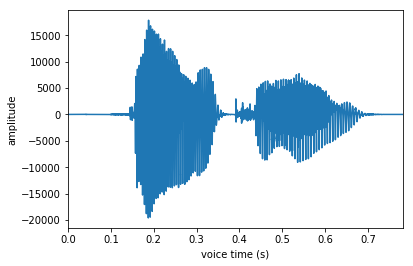

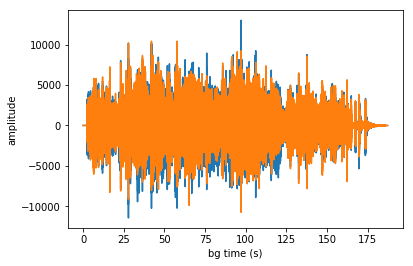

In [15]:
""" 소리 데이터와 샘플링 주파수를 그래프로 출력 """
import matplotlib.pyplot as plt
plt.plot(v_times, v_data)
plt.xlim(v_times[0], v_times[-1])
plt.xlabel('voice time (s)')
plt.ylabel('amplitude')
plt.show()
plt.plot(b_times, b_data)
plt.xlabel('bg time (s)')
plt.ylabel('amplitude')
plt.show()

In [16]:
""" 소리파일의 샘플링 주파수와 채널 타입 바꾸기 """
#stereo channel을 mono channel로 변경
if len(v_data.shape) > 1 :
    v_data = np.array(v_data[:, 0])
    
if len(b_data.shape) > 1 :
    b_data = np.array(b_data[:, 0])
    
#down sampling
if v_samplerate > b_samplerate :
    diff_rate = int(v_samplerate / b_samplerate)
    v_data = np.array(v_data[0:len(v_data) : diff_rate])
    sr = b_samplerate
    
elif v_samplerate < b_samplerate :
    diff_rate = int(b_samplerate / v_samplerate)
    b_data = np.array(b_data[0:len(b_data): diff_rate])
    sr = v_samplerate
    
else:
    sr = b_samplerate

In [17]:
mix_data = v_data + b_data[sr * 10 : len(v_data) + sr * 10] #10초 지점의 배경 음악과 음성 데이터 합성하기
b_data[sr * 10 : len(v_data) + sr * 10] = mix_data          #배경음악 10초 위치에 합성한 데이터를 넣기

scaled = np.int16(b_data/ np.max(np.abs(b_data)) * 32767)
write('soundfiles/music_card.wav', sr, scaled)
os.system('start soundfiles/music_card.wav')

0